In [132]:


# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, average_precision_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [133]:
# data exploration

raw = pd.read_csv('creditcard.csv')
raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [134]:
raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<AxesSubplot:title={'center':'Time'}>,
        <AxesSubplot:title={'center':'V1'}>,
        <AxesSubplot:title={'center':'V2'}>,
        <AxesSubplot:title={'center':'V3'}>,
        <AxesSubplot:title={'center':'V4'}>,
        <AxesSubplot:title={'center':'V5'}>],
       [<AxesSubplot:title={'center':'V6'}>,
        <AxesSubplot:title={'center':'V7'}>,
        <AxesSubplot:title={'center':'V8'}>,
        <AxesSubplot:title={'center':'V9'}>,
        <AxesSubplot:title={'center':'V10'}>,
        <AxesSubplot:title={'center':'V11'}>],
       [<AxesSubplot:title={'center':'V12'}>,
        <AxesSubplot:title={'center':'V13'}>,
        <AxesSubplot:title={'center':'V14'}>,
        <AxesSubplot:title={'center':'V15'}>,
        <AxesSubplot:title={'center':'V16'}>,
        <AxesSubplot:title={'center':'V17'}>],
       [<AxesSubplot:title={'center':'V18'}>,
        <AxesSubplot:title={'center':'V19'}>,
        <AxesSubplot:title={'center':'V20'}>,
        <AxesSubplot:title={'center':'V

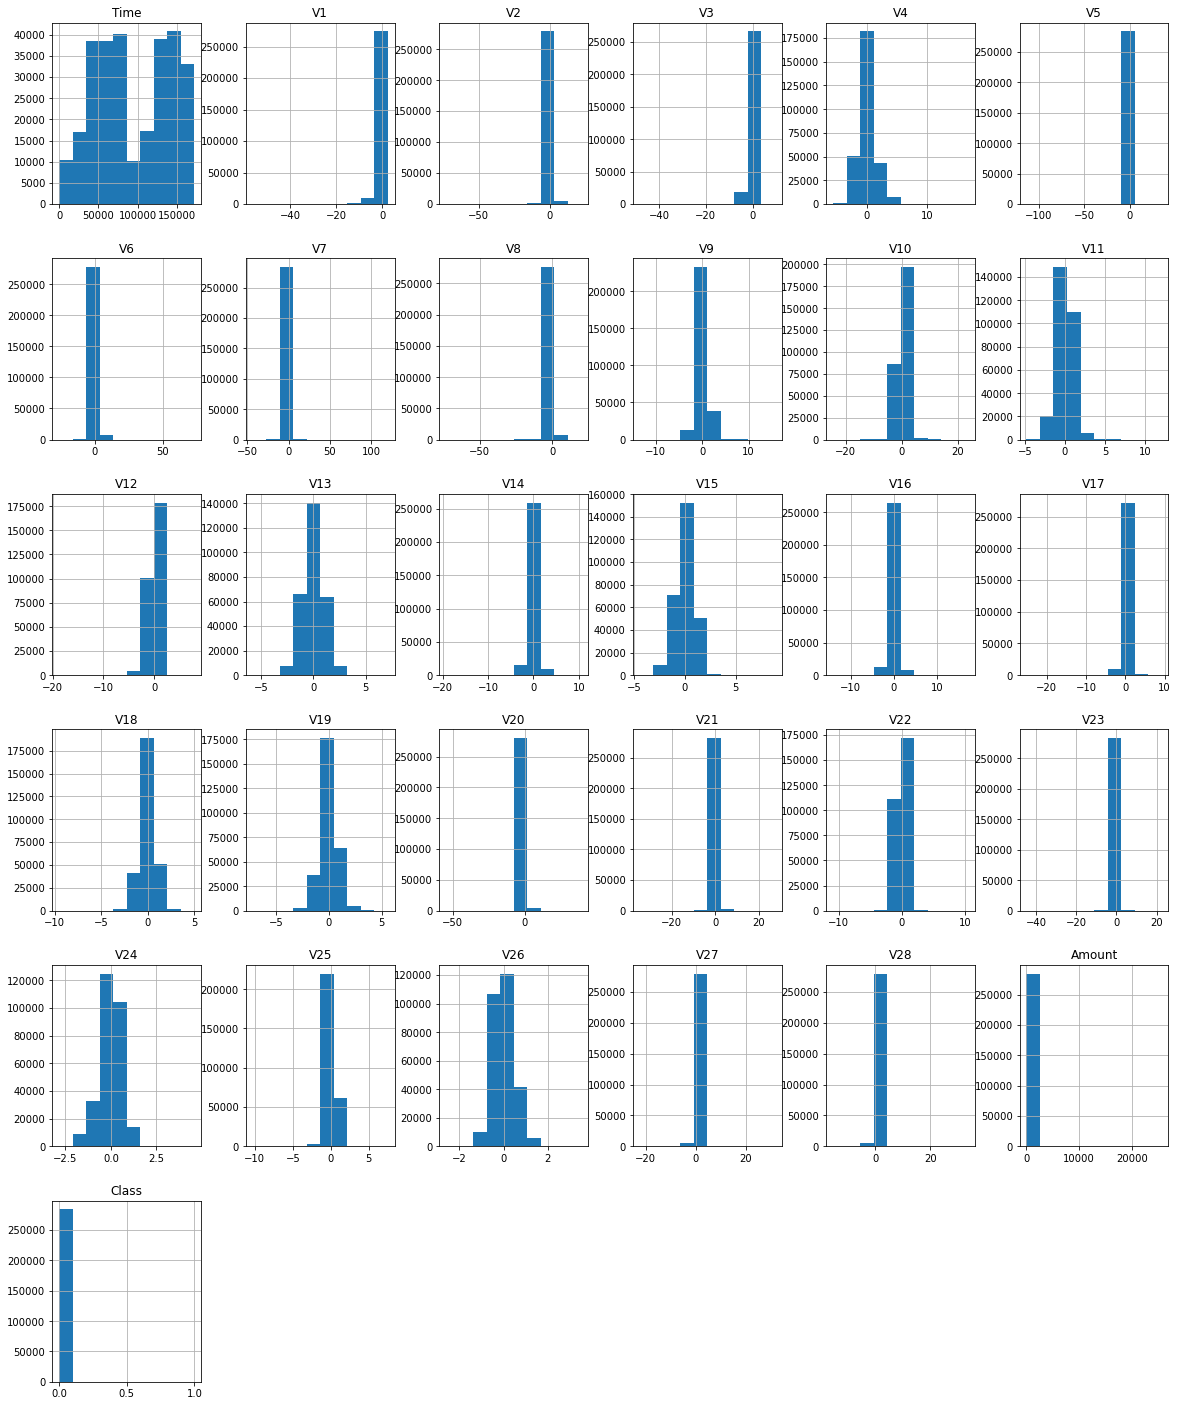

In [135]:
# briefly check the distributions of each feature

fig = plt.figure(figsize = (20,25))
ax = fig.gca()
raw.hist(ax = ax)

In [136]:
# The classes are heavily skewed we need to solve this issue later.
print('no of null value in dataset: {}'.format(raw.isnull().sum().max()))
print('No Frauds {}% of the dataset'.format(round(raw['Class'].value_counts()[0]/len(raw) * 100,2)))
print('Frauds {}% of the dataset'.format(round(raw['Class'].value_counts()[1]/len(raw) * 100,2)))

no of null value in dataset: 0
No Frauds 99.83% of the dataset
Frauds 0.17% of the dataset


Text(0.5, 1.0, 'Class Proportation \n (0 - No Fraud, 1 - Fraud)')

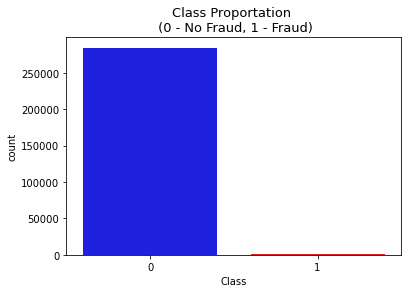

In [137]:
# check the class balance

colors = ["blue", "red"]

sns.countplot('Class', data=raw, palette=colors)
plt.title('Class Proportation \n (0 - No Fraud, 1 - Fraud)', fontsize=13)

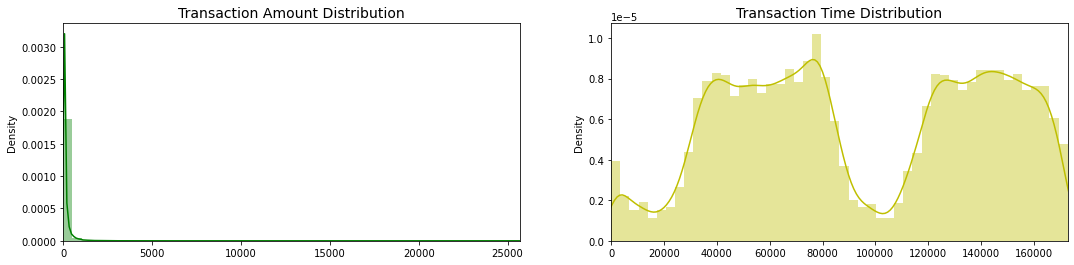

In [138]:
# check amount, time distributions if they need normalization 

fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = raw['Amount'].values
time_val = raw['Time'].values

sns.distplot(amount_val, ax=ax[0], color='g')
ax[0].set_title('Transaction Amount Distribution', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='y')
ax[1].set_title('Transaction Time Distribution', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])


plt.show()

In [139]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
# RobustScaler is less prone to outliers.

# std_scaler = StandardScaler()
rob_scaler = RobustScaler()

raw['scaled_amount'] = rob_scaler.fit_transform(raw['Amount'].values.reshape(-1,1))
raw['scaled_time'] = rob_scaler.fit_transform(raw['Time'].values.reshape(-1,1))

raw.drop(['Time','Amount'], axis=1, inplace=True)

scaled_amount = raw['scaled_amount']
scaled_time = raw['scaled_time']

raw.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
raw.insert(0, 'scaled_amount', scaled_amount)
raw.insert(1, 'scaled_time', scaled_time)

# Amount and Time are Scaled!

raw.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [140]:
# Check the Labels distributions in number 

print('No Frauds {}% of the dataset'.format(round(raw['Class'].value_counts()[0]/len(raw) * 100,2)))
print('Frauds {}% of the dataset'.format(round(raw['Class'].value_counts()[1]/len(raw) * 100,2)))

train = raw.drop('Class', axis=1)
test = raw['Class']

sfold = StratifiedKFold(n_splits=6, random_state=None, shuffle=False)

for train_index, test_index in sfold.split(train, test):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = train.iloc[train_index], train.iloc[test_index]
    original_ytrain, original_ytest = test.iloc[train_index], test.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
# original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83% of the dataset
Frauds 0.17% of the dataset
Train: [ 18472  18773  18809 ... 284804 284805 284806] Test: [    0     1     2 ... 47529 47530 47531]
Train: [     0      1      2 ... 284804 284805 284806] Test: [18472 18773 18809 ... 94986 94987 94988]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 63421  63634  64329 ... 142425 142426 142427]
Train: [     0      1      2 ... 284804 284805 284806] Test: [119781 120505 120837 ... 189912 189913 189914]
Train: [     0      1      2 ... 284804 284805 284806] Test: [152223 152295 153823 ... 237358 237359 237360]
Train: [     0      1      2 ... 237358 237359 237360] Test: [222419 223366 223572 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827252 0.00172748]
[0.99827248 0.00172752]


In [141]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

raw = raw.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_raw = raw.loc[raw['Class'] == 1]
non_fraud_raw = raw.loc[raw['Class'] == 0][:492]

normal_distributed_raw = pd.concat([fraud_raw, non_fraud_raw])

# Shuffle dataframe rows
new_raw = normal_distributed_raw.sample(frac=1, random_state=42)

new_raw.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
81990,1.082093,-0.299534,-1.701900,-1.386433,1.899125,-2.254890,0.681936,0.022781,-0.474210,0.522747,...,0.380946,0.023124,-0.202237,0.044604,-0.836694,0.503260,-0.102596,-0.000523,0.070386,0
157918,8.567037,0.304574,-1.101035,-1.674928,-0.573388,5.617556,0.765556,0.440607,1.934740,-1.019788,...,-0.038314,-0.412526,-0.208823,0.344833,1.091435,-0.686513,0.075809,0.033865,-0.832855,1
46024,-0.029344,-0.494425,-1.450862,1.132894,1.082909,-1.388702,0.487570,0.431293,-0.551760,-2.276668,...,-0.661752,2.166654,-1.151129,-0.085335,-0.813181,-0.427718,0.449995,0.113635,0.101410,0
122479,2.763921,-0.095361,-5.622469,3.480623,-6.200677,4.311234,-5.226286,-1.341764,-5.220941,2.682844,...,-0.156289,0.949569,-0.428986,-0.350676,0.197550,0.159234,-0.377791,-0.213562,0.459529,1
6334,-0.293440,-0.906460,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,...,0.587743,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


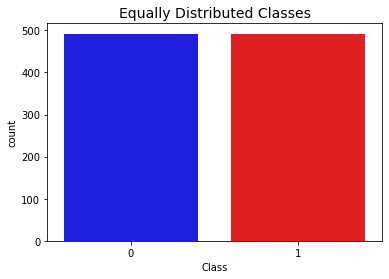

In [142]:
# Ensure the classes are balanced

print('Distribution of the Classes in the subsample dataset')
print(new_raw['Class'].value_counts()/len(new_raw))


sns.countplot('Class', data=new_raw, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

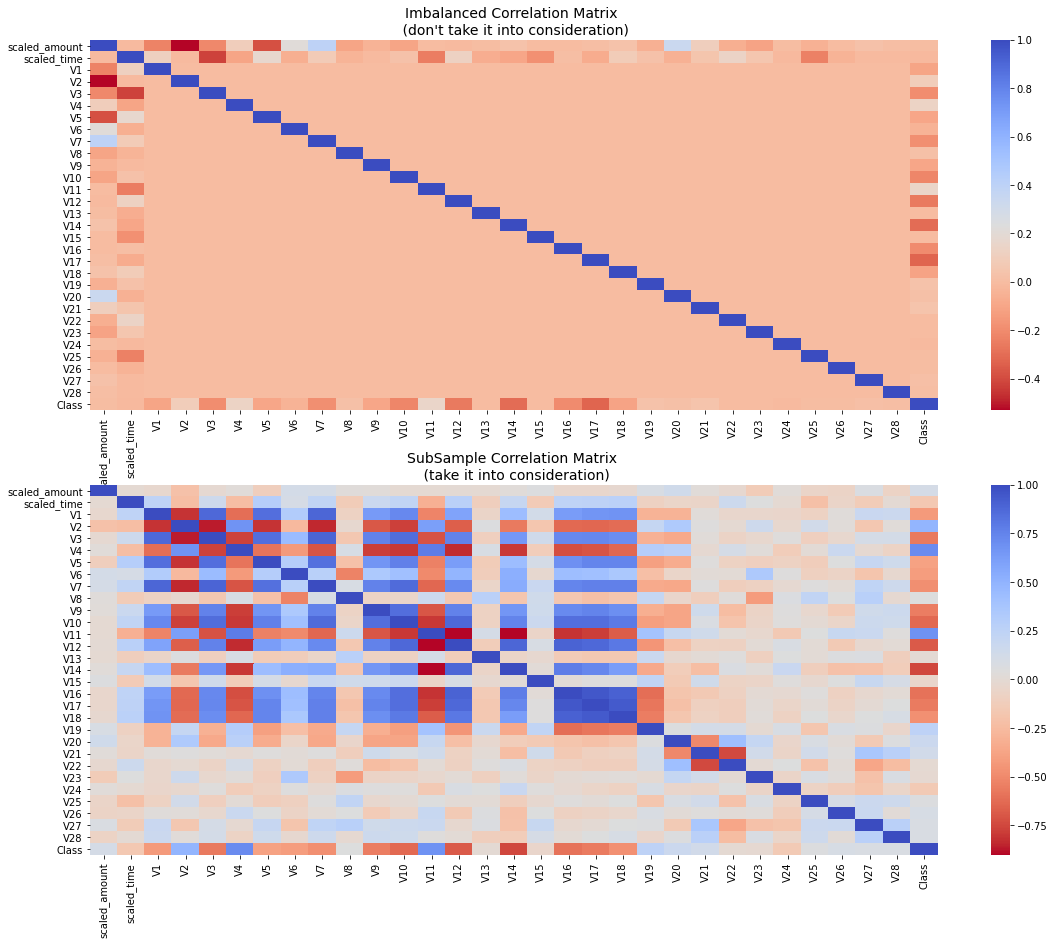

In [143]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(19,15))

# Entire DataFrame
corr = raw.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't take it into consideration)", fontsize=14)


sub_sample_corr = new_raw.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (take it into consideration)', fontsize=14)
plt.show()

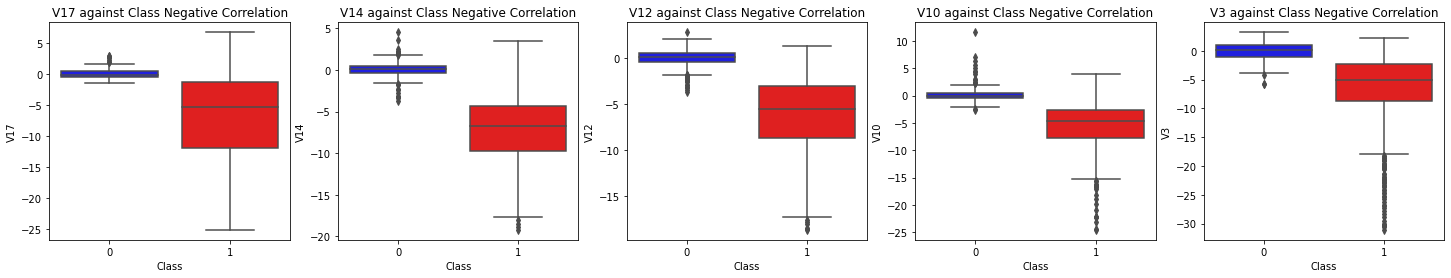

In [144]:
# Visualize the negative correlations of the potential features

f, axes = plt.subplots(ncols=5, figsize=(25,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_raw, palette=colors, ax=axes[0])
axes[0].set_title('V17 against Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_raw, palette=colors, ax=axes[1])
axes[1].set_title('V14 against Class Negative Correlation')


sns.boxplot(x="Class", y="V12", data=new_raw, palette=colors, ax=axes[2])
axes[2].set_title('V12 against Class Negative Correlation')


sns.boxplot(x="Class", y="V10", data=new_raw, palette=colors, ax=axes[3])
axes[3].set_title('V10 against Class Negative Correlation')


sns.boxplot(x="Class", y="V3", data=new_raw, palette=colors, ax=axes[4])
axes[4].set_title('V3 against Class Negative Correlation')

plt.show()

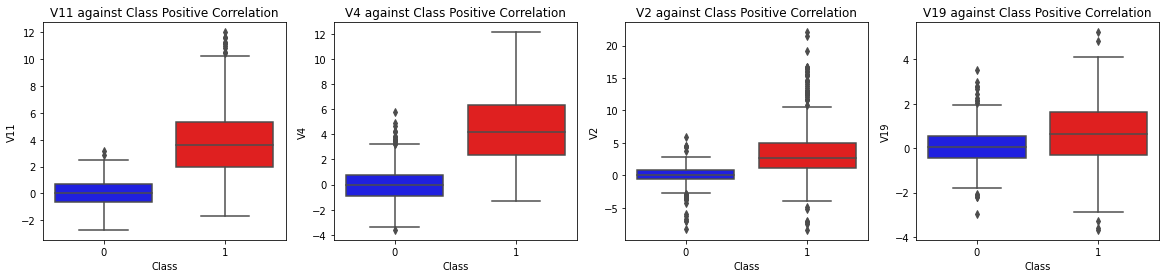

In [145]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_raw, palette=colors, ax=axes[0])
axes[0].set_title('V11 against Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_raw, palette=colors, ax=axes[1])
axes[1].set_title('V4 against Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=new_raw, palette=colors, ax=axes[2])
axes[2].set_title('V2 against Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_raw, palette=colors, ax=axes[3])
axes[3].set_title('V19 against Class Positive Correlation')

plt.show()

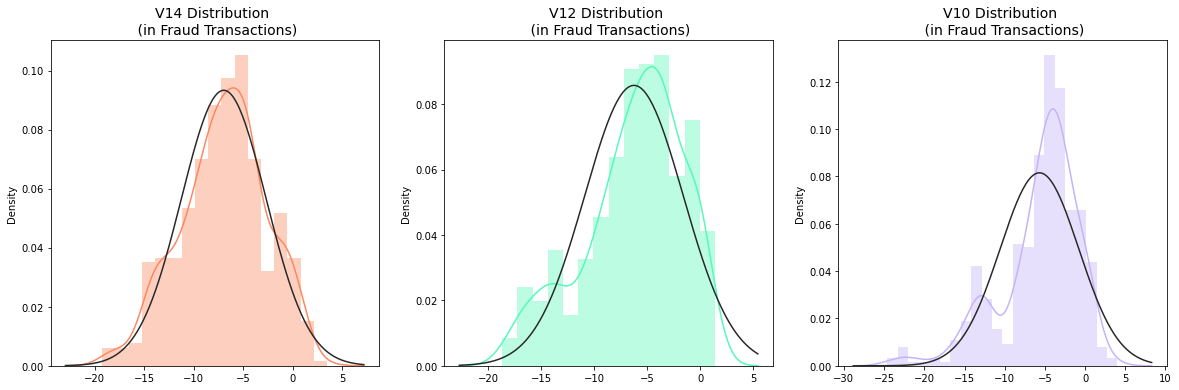

In [146]:
# Visualize the distributions of the potential features with the negative correlation against class

f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))

v14_fraud_dist = new_raw['V14'].loc[new_raw['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (in Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_raw['V12'].loc[new_raw['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (in Fraud Transactions)', fontsize=14)


v10_fraud_dist = new_raw['V10'].loc[new_raw['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (in Fraud Transactions)', fontsize=14)

plt.show()

In [147]:
# # -----> V14 Removing Outliers (Highest Negative Correlated with Labels)

v14_fraud = new_raw['V14'].loc[new_raw['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v14_iqr = q75 - q25
print('interval >q25 and <q75 (iqr): {}'.format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off: {}'.format(v14_cut_off))
print('V14 Lower: {}'.format(v14_lower))
print('V14 Upper: {}'.format(v14_upper))

outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V10 outliers:{}'.format(outliers))

new_raw = new_raw.drop(new_raw[(new_raw['V14'] > v14_upper) | (new_raw['V14'] < v14_lower)].index)
print('----' * 44)

# -----> V12 removing outliers from fraud transactions

v12_fraud = new_raw['V12'].loc[new_raw['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_cut_off = (q75 - q25) * 1.5   #v12_iqr
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
print('V12 Lower: {}'.format(v12_lower))
print('V12 Upper: {}'.format(v12_upper))
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('V12 outliers: {}'.format(outliers))
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_raw = new_raw.drop(new_raw[(new_raw['V12'] > v12_upper) | (new_raw['V12'] < v12_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_raw)))
print('----' * 44)


# Removing outliers V10 Feature

v10_fraud = new_raw['V10'].loc[new_raw['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_cut_off = (q75 - q25) * 1.5   #v10_iqr = q75 - q25
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('V10 Lower: {}'.format(v10_lower))
print('V10 Upper: {}'.format(v10_upper))
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('V10 outliers: {}'.format(outliers))
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
new_raw = new_raw.drop(new_raw[(new_raw['V10'] > v10_upper) | (new_raw['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_raw)))


Quartile 25: -9.692722964972385 | Quartile 75: -4.282820849486866
interval >q25 and <q75 (iqr): 5.409902115485519
Cut Off: 8.114853173228278
V14 Lower: -17.807576138200663
V14 Upper: 3.8320323237414122
Feature V14 Outliers for Fraud Cases: 4
V10 outliers:[-19.2143254902614, -18.8220867423816, -18.4937733551053, -18.049997689859396]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V12 Lower: -17.3430371579634
V12 Upper: 5.776973384895937
V12 outliers: [-18.683714633344298, -18.553697009645802, -18.047596570821604, -18.4311310279993]
Feature V12 Outliers for Fraud Cases: 4
Number of Instances after outliers removal: 975
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
V10 Lower: -14.89885463232024
V10 Upper: 4.920334958342141
V10 outlie

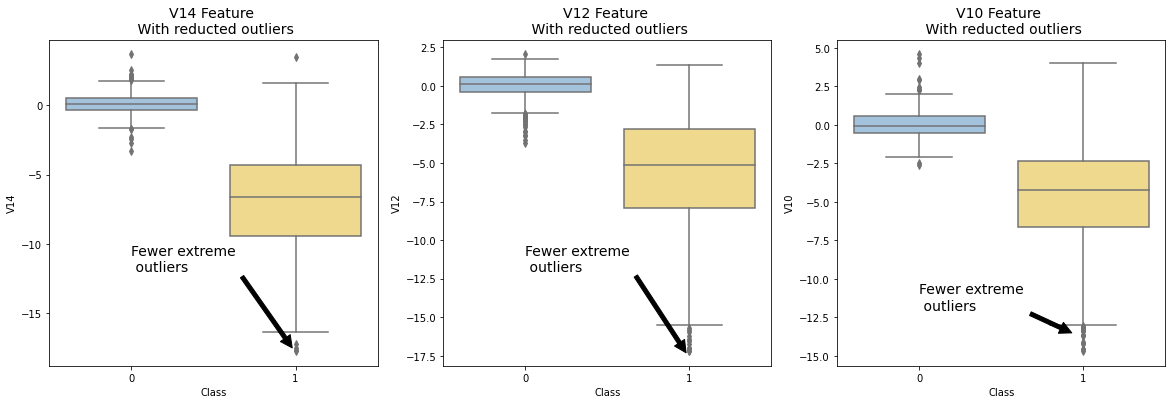

In [148]:
# Outliers are removed

f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#99c3e6', '#fee27f']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_raw,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n With reducted outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_raw, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n With reducted outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_raw, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n With reducted outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.93, -13.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

Dimensionality reduction algorithms implementation time:
T-SNE spent 2.9 s
PCA spent 0.042 s
Truncated SVD spent 0.009 s



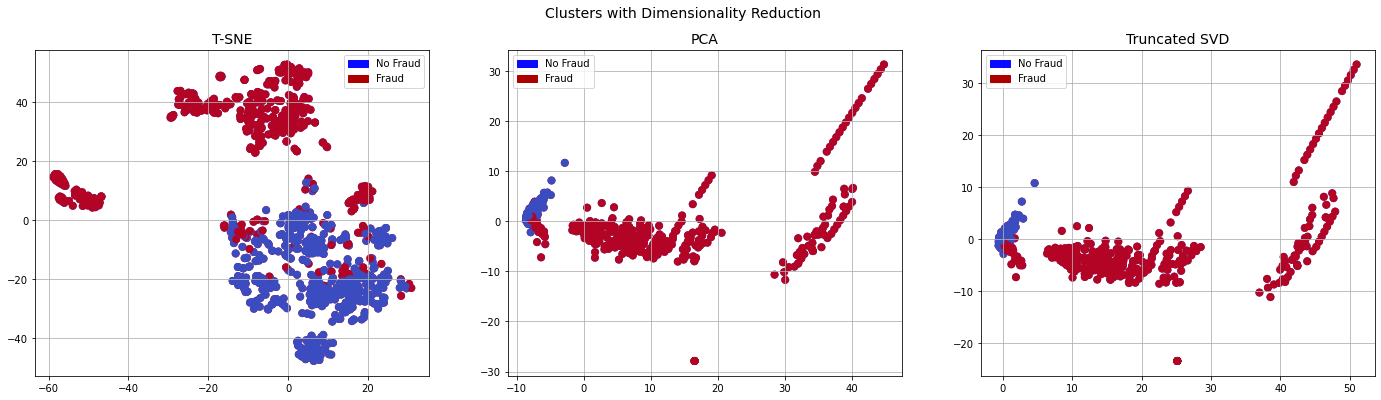

In [149]:
# check class dependence

# New_df is from the random undersample data (fewer instances)
X = new_raw.drop('Class', axis=1)
y = new_raw['Class']
print("Dimensionality reduction algorithms implementation time:")

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE spent {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA spent {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD spent {:.2} s\n".format(t1 - t0))

################################################

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters with Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('T-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [150]:
# check the accuracy score by building some models without cross-validation

# Undersampling before cross validating (prone to overfit)
train = new_raw.drop('Class', axis=1)
test = new_raw['Class']

# Our data is already scaled we should split our training and test sets
# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

# Wow our scores are getting even high scores even when applying cross validation.

print("---In undersampling---")
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: {} has a training score of {}% accuracy score".format(classifier.__class__.__name__ , round(training_score.mean(), 2) * 100))

---In undersampling---
Classifiers: LogisticRegression has a training score of 94.0% accuracy score
Classifiers: KNeighborsClassifier has a training score of 93.0% accuracy score
Classifiers: SVC has a training score of 93.0% accuracy score
Classifiers: DecisionTreeClassifier has a training score of 89.0% accuracy score


In [151]:
# Use GridSearchCV to find the best parameters.

# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [152]:
# Overfitting Case

print('---Using the best estimator---')
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: {}%'.format(round(log_reg_score.mean() * 100, 2).astype(str)))

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score {}%'.format(round(knears_score.mean() * 100, 2).astype(str)))

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score {}%'.format(round(svc_score.mean() * 100, 2).astype(str)))

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score {}%'.format(round(tree_score.mean() * 100, 2).astype(str)))

---Using the best estimator---
Logistic Regression Cross Validation Score: 94.03%
Knears Neighbors Cross Validation Score 93.5%
Support Vector Classifier Cross Validation Score 94.17%
DecisionTree Classifier Cross Validation Score 93.24%


In [153]:
# We will undersample during cross validating
undersample_X = raw.drop('Class', axis=1)
undersample_y = raw['Class']

for train_index, test_index in sfold.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}\n'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sfold.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

print(undersample_accuracy, undersample_precision, undersample_recall, undersample_f1, undersample_auc)

Train: [ 47451  47452  47453 ... 284804 284805 284806] Test: [    0     1     2 ... 54470 57370 57471]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 47451  47452  47453 ... 105229 105324 105698]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 94919  94920  94921 ... 151260 152019 152760]
Train: [     0      1      2 ... 284804 284805 284806] Test: [142391 142392 142393 ... 200087 200277 200424]
Train: [     0      1      2 ... 284804 284805 284806] Test: [189847 189848 189849 ... 244707 245018 245132]
Train: [     0      1      2 ... 244707 245018 245132] Test: [237322 237323 237324 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({0: 492, 1: 492})

[0.6537148924337033, 0.8024622696362211, 0.7465682432944865, 0.7055641226584423, 0.8074375568813833, 0.8209879664273435] [0.0028403525954946132, 0.001882479494419793, 0.0012493492972410203, 0.0027458557917217534, 0.0005339028296849973, 0.0006259780907668231] [0.27884615384615385, 0.1609195402298

In [154]:
# Let's Plot LogisticRegression Learning Curve
# see how the size of dataset affect the learning of models

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#f3722c")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#43aa8b")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#f3722c",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#43aa8b",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression \n Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#f3722c")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#43aa8b")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#f3722c",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#43aa8b",
             label="Cross-validation score")
    ax2.set_title("K-Nears Neighbors \n Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#f3722c")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#43aa8b")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#f3722c",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#43aa8b",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#f3722c")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#43aa8b")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#f3722c",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#43aa8b",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/home/aaron/miniconda3/lib/python3.8/site-packages/matplotlib/pyplot.py'>

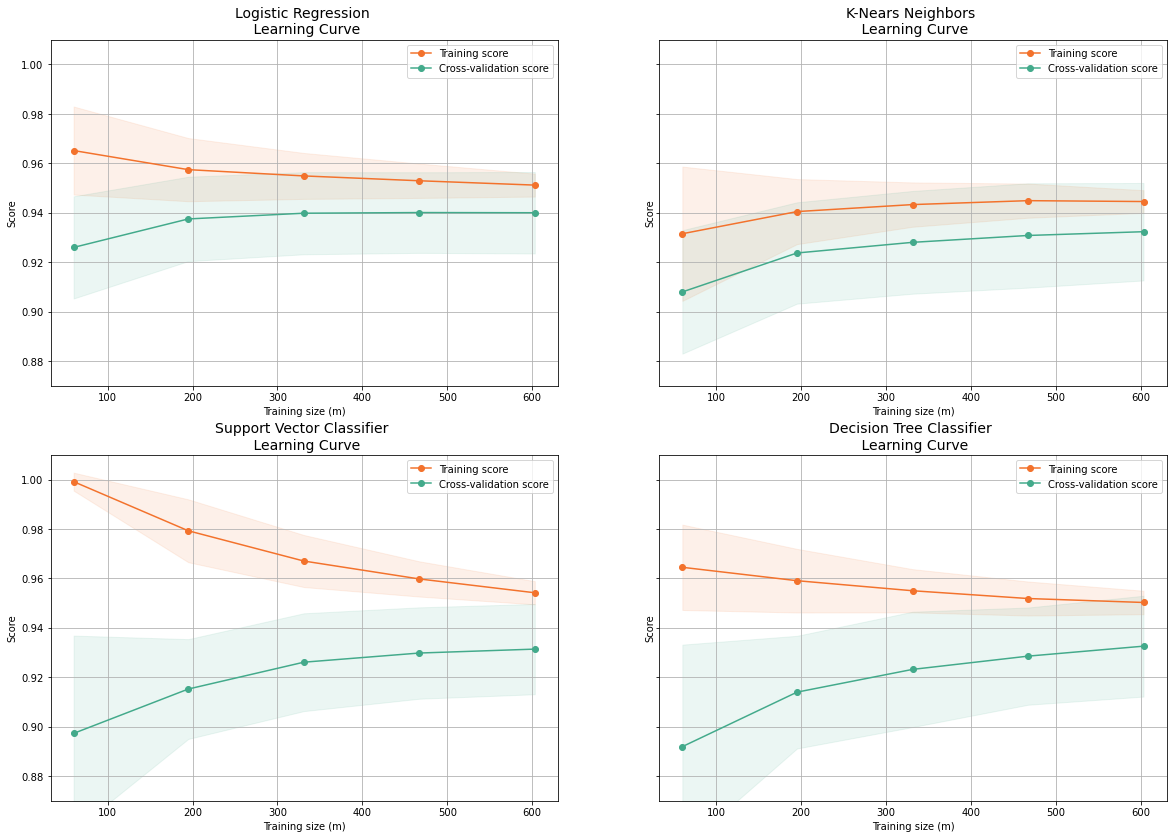

In [155]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [156]:
# check how well the model distinguish classes
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

print('Logistic Regression roc score: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors roc score: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier roc score: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier roc score: ', roc_auc_score(y_train, tree_pred))

Logistic Regression roc score:  0.9775257949783428
KNears Neighbors roc score:  0.9332147762087545
Support Vector Classifier roc score:  0.9701447335986195
Decision Tree Classifier roc score:  0.9273796527802233


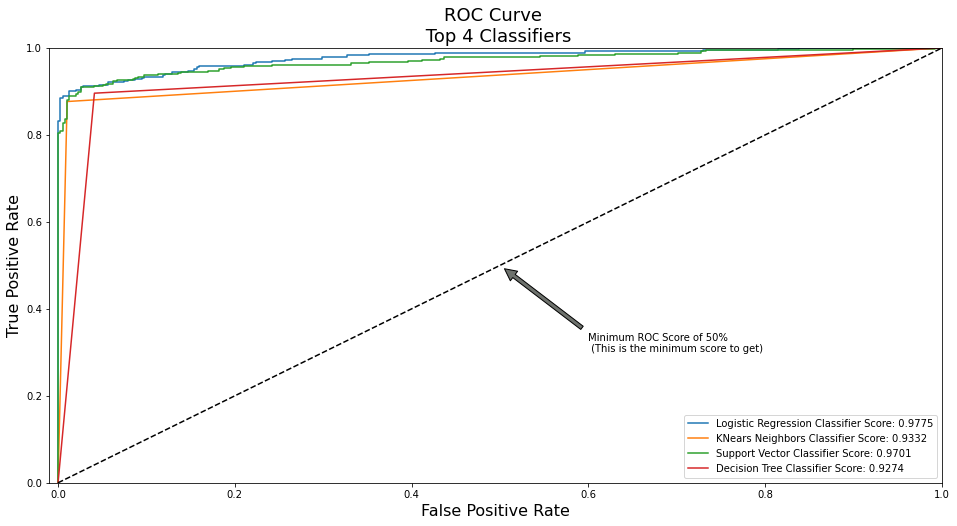

In [157]:
# visualize the models how well they distinguish classes

log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

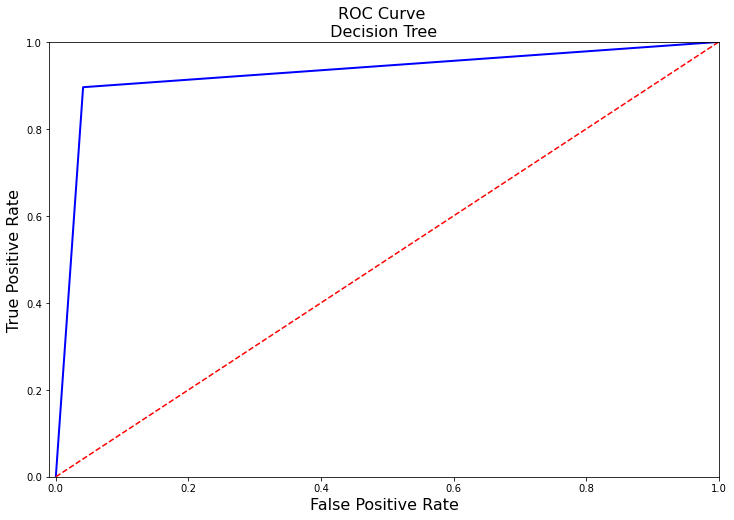

In [180]:
# visualize logistic regression how well it distinguishes classes

def logistic_roc_curve(tree_fpr, tree_tpr):
    plt.figure(figsize=(12,8))
    plt.title('ROC Curve \n Decision Tree ', fontsize=16)
    plt.plot(tree_fpr, tree_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(tree_fpr, tree_tpr)
plt.show()

In [159]:
# compare the performance with and without cross-validation by using undersampling

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))

undersample_y_score = log_reg.decision_function(original_Xtest)

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.90
Precision Score: 0.77
F1 Score: 0.83
Accuracy Score: 0.82
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.76
Precision Score: 0.00
Recall Score: 0.22
F1 Score: 0.00
Average precision-recall score: 0.05
---------------------------------------------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.05')

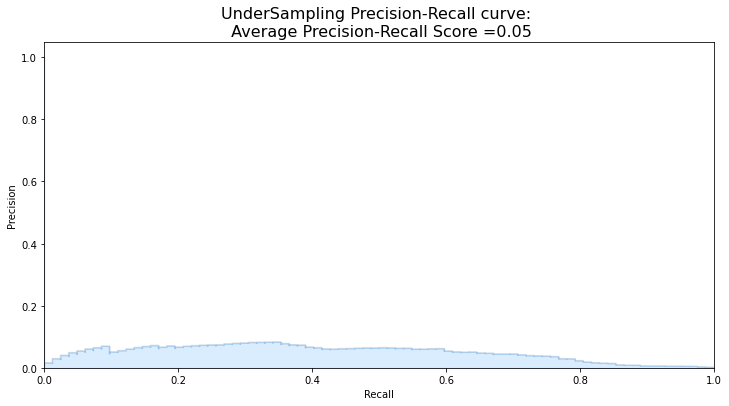

In [160]:
# visualize the precision-recall performance of the model by using undersampling 

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [161]:



# print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
# print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# # List to append the score and then find the average
# accuracy_lst = []
# precision_lst = []
# recall_lst = []
# f1_lst = []
# auc_lst = []

# # Classifier with optimal parameters
# # log_reg_sm = grid_log_reg.best_estimator_
# log_reg_sm = LogisticRegression()




# rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# # Implementing SMOTE Technique 
# # Cross Validating the right way
# # Parameters
# log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
# for train, test in sfold.split(original_Xtrain, original_ytrain):
#     pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
#     model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
#     best_est = rand_log_reg.best_estimator_
#     prediction = best_est.predict(original_Xtrain[test])
    
#     accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
#     precision_lst.append(precision_score(original_ytrain[test], prediction))
#     recall_lst.append(recall_score(original_ytrain[test], prediction))
#     f1_lst.append(f1_score(original_ytrain[test], prediction))
#     auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
# print('---' * 45)
# print('')
# print("accuracy: {}".format(np.mean(accuracy_lst)))
# print("precision: {}".format(np.mean(precision_lst)))
# print("recall: {}".format(np.mean(recall_lst)))
# print("f1: {}".format(np.mean(f1_lst)))
# print('---' * 45)

In [163]:
# apply SMOTE technique to augument the size of the dataset 


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()



rand_tree = RandomizedSearchCV(DecisionTreeClassifier(), tree_params, n_iter=2)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters

tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
for train, test in sfold.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_tree) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_tree.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 237340 | Length of y (train): 237340
Length of X (test): 47467 | Length of y (test): 47467
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9539646817844943
precision: 0.05784049191500971
recall: 0.8686061381074168
f1: 0.10278257212035323
---------------------------------------------------------------------------------------------------------------------------------------


In [164]:
# print classification report

labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))



              precision    recall  f1-score   support

    No Fraud       1.00      0.99      1.00     47385
       Fraud       0.19      0.80      0.31        82

    accuracy                           0.99     47467
   macro avg       0.60      0.90      0.65     47467
weighted avg       1.00      0.99      1.00     47467



In [179]:
# # y_score = best_est.decision_function(original_Xtest)

# tree_scores.append(precision_score(y_test,smote_prediction))

# # average_precision = average_precision_score(original_ytest, y_score)

# # print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.15')

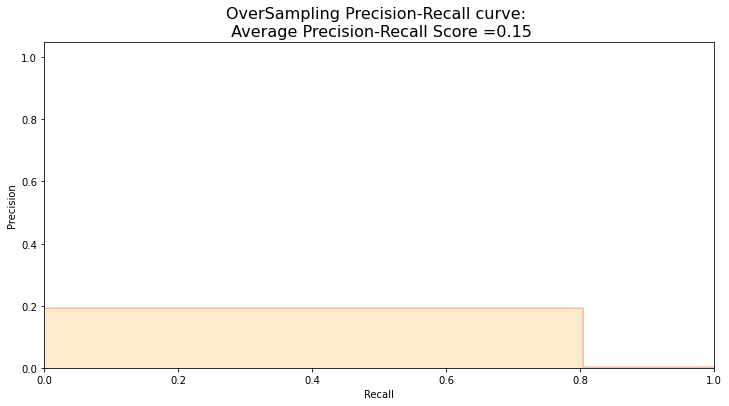

In [172]:
# Generate percision-recall curve with the same setting as the environment of undersampling

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)



In [175]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating

sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)


# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
tree_sm = grid_tree.best_estimator_
tree_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))



Fitting oversample data took :9.332151174545288 sec


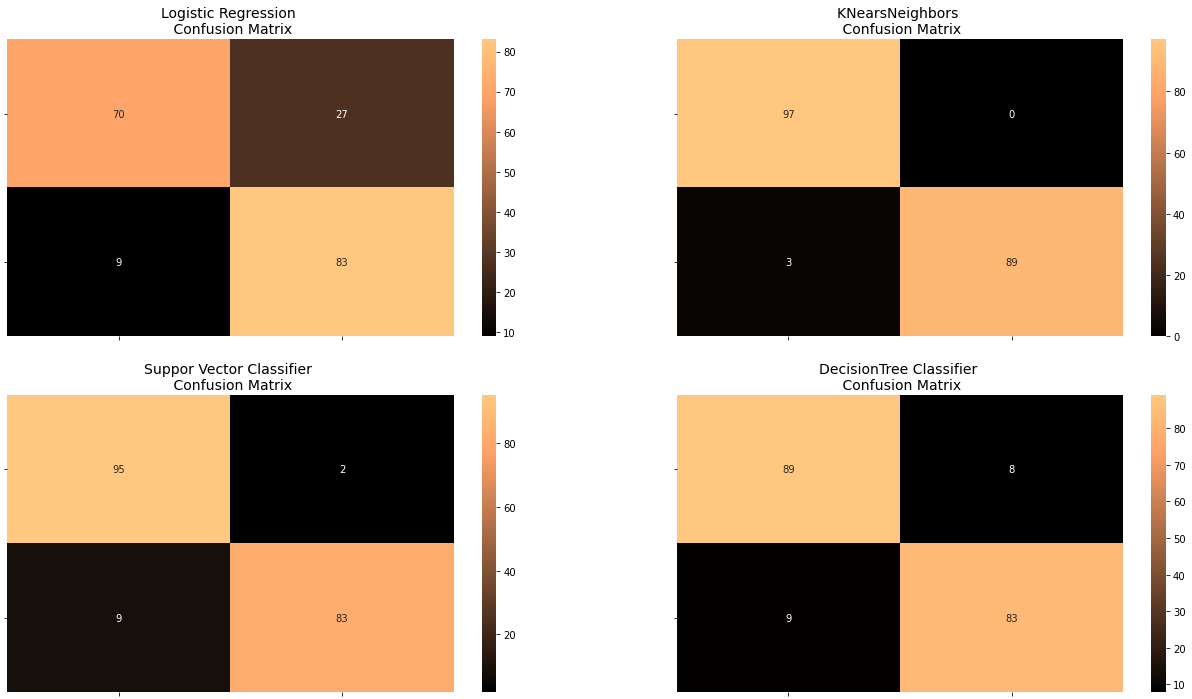

In [176]:
# Decision tree fitted using SMOTE technique
y_pred_tree = tree_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_knear = knears_neighbors.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()


In [177]:

# print the classification reports for Knears Neighbor fitted using SMOTE technique, and the other models fitted with UnderSampling

print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))



Logistic Regression:
              precision    recall  f1-score   support

           0       0.89      0.72      0.80        97
           1       0.75      0.90      0.82        92

    accuracy                           0.81       189
   macro avg       0.82      0.81      0.81       189
weighted avg       0.82      0.81      0.81       189

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        97
           1       1.00      0.97      0.98        92

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95        97
           1       0.98      0.90      0.94        92

    accuracy                           0.94       189
   macro avg       0.94      0.94      0.94       189
weighted

In [178]:
# Final Score in the test set of logistic regression is printed
# Decision tree with Under-Sampling
y_pred = tree_clf.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)


# Decision tree with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df


,Technique,Score
0,Random UnderSampling,0.910053
1,Oversampling (SMOTE),0.993785
